In [3]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [5]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [6]:
tf.keras.backend.clear_session()

In [7]:
subject = 'Piauí - Consumo de Cimento (t)'
start_index = 0
split_index = 191 #Referente aos 230 anos de input 
window_size = 36
train_split = split_index + 1 - 30

In [11]:
data = pd.read_csv('2003_mo_model_input_PI.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Precipitation (mm/day),...,Air Relative Humidity (%),Wind Gust (m/s),Piauí - IDH,Piauí - Produção de Cimento (t),Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - Desemprego,Piauí - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,0.572145,...,65.288728,1.531145,0.649218,24.669760,2.136063e+07,1.358044e+06,6.061141,1.868149e+07,8.192266,21.844
1,2003-2,0.690297,-5318.079644,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,0.575756,...,65.296204,1.530215,0.649661,25.167145,2.139102e+07,1.359835e+06,6.065065,1.869506e+07,8.186156,15.814
2,2003-3,0.669681,-5436.417870,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,0.577863,...,65.300565,1.529673,0.650104,25.520404,2.142142e+07,1.361626e+06,6.068988,1.870864e+07,8.180046,16.067
3,2003-4,0.660494,-5707.015274,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,0.578089,...,65.301032,1.529614,0.650548,25.519725,2.145181e+07,1.363417e+06,6.072912,1.872222e+07,8.173937,14.938
4,2003-5,0.648337,-5599.317941,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,0.565428,...,65.747286,1.500524,0.650991,25.929312,2.148221e+07,1.365208e+06,6.076835,1.873580e+07,8.167827,17.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.074106,...,65.043563,1.193789,NaN,12.957215,NaN,NaN,NaN,NaN,NaN,77.776
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.566287,...,65.750840,1.188688,NaN,12.965575,NaN,NaN,NaN,NaN,NaN,72.377
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.378981,...,66.409629,1.181832,NaN,12.977734,NaN,NaN,NaN,NaN,NaN,71.791
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780859,...,68.493844,1.135497,NaN,12.994123,NaN,NaN,NaN,NaN,NaN,71.015


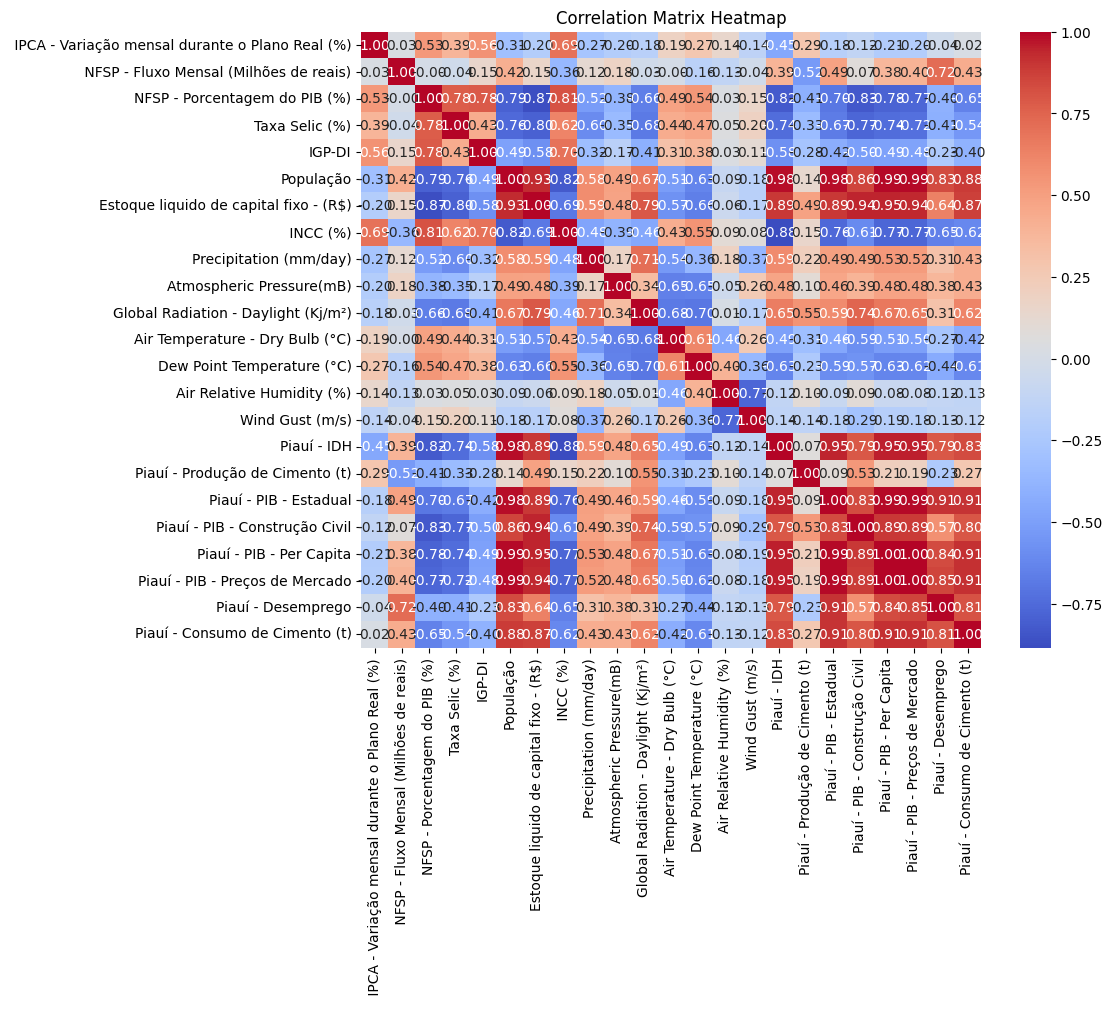

In [12]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [14]:
data =data.drop([' IPCA - Variação mensal durante o Plano Real (%)',
                 'Air Relative Humidity (%)', 
                 'Wind Gust (m/s)'], axis=1)
data

,Unnamed: 0,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Precipitation (mm/day),Atmospheric Pressure(mB),...,Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Piauí - IDH,Piauí - Produção de Cimento (t),Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - Desemprego,Piauí - Consumo de Cimento (t)
0,2003-1,-5331.049150,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,0.572145,1002.090457,...,29.774322,22.498674,0.649218,24.669760,2.136063e+07,1.358044e+06,6.061141,1.868149e+07,8.192266,21.844
1,2003-2,-5318.079644,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,0.575756,1002.091633,...,29.768728,22.492857,0.649661,25.167145,2.139102e+07,1.359835e+06,6.065065,1.869506e+07,8.186156,15.814
2,2003-3,-5436.417870,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,0.577863,1002.092318,...,29.765464,22.489463,0.650104,25.520404,2.142142e+07,1.361626e+06,6.068988,1.870864e+07,8.180046,16.067
3,2003-4,-5707.015274,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,0.578089,1002.092392,...,29.765115,22.489100,0.650548,25.519725,2.145181e+07,1.363417e+06,6.072912,1.872222e+07,8.173937,14.938
4,2003-5,-5599.317941,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,0.565428,1001.931726,...,29.985428,22.815550,0.650991,25.929312,2.148221e+07,1.365208e+06,6.076835,1.873580e+07,8.167827,17.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.074106,1002.965480,...,27.722393,19.445482,NaN,12.957215,NaN,NaN,NaN,NaN,NaN,77.776
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.566287,1002.534000,...,27.859443,19.817698,NaN,12.965575,NaN,NaN,NaN,NaN,NaN,72.377
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.378981,1002.279985,...,27.872540,20.035754,NaN,12.977734,NaN,NaN,NaN,NaN,NaN,71.791
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780859,1002.210237,...,27.601683,20.402573,NaN,12.994123,NaN,NaN,NaN,NaN,NaN,71.015


In [15]:
input_data = data.iloc[:split_index + 1,1:-1]
# mean = np.mean(input_data, axis=0)
# stddev =  np.std(input_data, axis=0)
# input_data = ((input_data - mean) /stddev)
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)
input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data

,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Piauí - IDH,Piauí - Produção de Cimento (t),Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - Desemprego
0,0.310283,1.000000,0.813935,1.000000,0.000000,0.000000,1.000000,0.149609,0.433287,0.370188,0.379563,0.382694,0.000000,0.231191,0.000000,0.000000,0.000000,0.000000,0.078897
1,0.311059,0.965719,0.698054,0.936603,0.007992,0.011007,0.968938,0.150553,0.433428,0.371712,0.379087,0.382220,0.010908,0.245044,0.005814,0.017769,0.008894,0.008766,0.077028
2,0.303979,0.927412,1.000000,0.906543,0.015984,0.022015,0.948438,0.151104,0.433510,0.372600,0.378809,0.381944,0.021817,0.254883,0.011628,0.035538,0.017788,0.017531,0.075160
3,0.287789,0.885588,0.629650,0.858675,0.023976,0.033022,0.928794,0.151163,0.433519,0.372696,0.378780,0.381914,0.032725,0.254864,0.017443,0.053307,0.026682,0.026297,0.073291
4,0.294233,0.838034,0.795263,0.824839,0.031968,0.044030,0.970421,0.147852,0.414251,0.354542,0.397516,0.408501,0.043633,0.266272,0.023257,0.071077,0.035577,0.035063,0.071422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.794606,0.030808,0.075260,0.381401,0.987600,0.828698,0.005731,0.419076,0.531121,0.764863,0.277509,0.158930,0.978318,0.028551,0.973453,0.793501,0.961232,0.960092,0.945259
188,0.869001,0.027720,0.052572,0.466609,0.990700,0.823090,0.037761,0.566767,0.483109,0.754401,0.288866,0.189129,0.976544,0.020943,0.970065,0.797449,0.956913,0.955740,0.944716
189,0.879026,0.023074,0.013826,0.530936,0.993800,0.817482,0.087044,0.554824,0.482906,0.740153,0.285867,0.234429,0.974770,0.013641,0.966677,0.801396,0.952594,0.951387,0.944172
190,0.928863,0.017547,0.056080,0.611274,0.996900,0.811875,0.118264,0.614353,0.486544,0.714620,0.264690,0.285325,0.972996,0.006656,0.963289,0.805344,0.948275,0.947035,0.943629


In [16]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-12)
target_data

0      18.413
1      16.605
2      22.084
3      22.445
4      23.323
        ...  
235       NaN
236       NaN
237       NaN
238       NaN
239       NaN
Name: Piauí - Consumo de Cimento (t), Length: 240, dtype: float64

In [17]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Piauí - IDH,Piauí - Produção de Cimento (t),Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - Desemprego
0,0.310283,1.000000,0.813935,1.000000,0.000000,0.000000,1.000000,0.149609,0.433287,0.370188,0.379563,0.382694,0.000000,0.231191,0.000000,0.000000,0.000000,0.000000,0.078897
1,0.311059,0.965719,0.698054,0.936603,0.007992,0.011007,0.968938,0.150553,0.433428,0.371712,0.379087,0.382220,0.010908,0.245044,0.005814,0.017769,0.008894,0.008766,0.077028
2,0.303979,0.927412,1.000000,0.906543,0.015984,0.022015,0.948438,0.151104,0.433510,0.372600,0.378809,0.381944,0.021817,0.254883,0.011628,0.035538,0.017788,0.017531,0.075160
3,0.287789,0.885588,0.629650,0.858675,0.023976,0.033022,0.928794,0.151163,0.433519,0.372696,0.378780,0.381914,0.032725,0.254864,0.017443,0.053307,0.026682,0.026297,0.073291
4,0.294233,0.838034,0.795263,0.824839,0.031968,0.044030,0.970421,0.147852,0.414251,0.354542,0.397516,0.408501,0.043633,0.266272,0.023257,0.071077,0.035577,0.035063,0.071422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.469629,0.024030,0.365935,0.039971,0.890665,0.956993,0.182507,0.500995,0.518686,0.693151,0.229171,0.324292,0.990867,0.532244,0.976314,0.748250,0.974121,0.975577,0.999216
158,0.458182,0.021531,0.401765,0.027548,0.893949,0.953662,0.168812,0.539605,0.572376,0.680239,0.212151,0.323380,0.991698,0.510976,0.978467,0.748313,0.976474,0.977798,0.998431
159,0.439618,0.019385,0.379504,0.037038,0.897232,0.950331,0.152959,0.458617,0.611019,0.694134,0.200641,0.262870,0.992528,0.489491,0.980620,0.748377,0.978826,0.980018,0.997647
160,0.456732,0.017671,0.440821,0.070841,0.900516,0.947000,0.137613,0.371972,0.661144,0.709622,0.205991,0.176503,0.993358,0.467789,0.982774,0.748441,0.981179,0.982238,0.996863


In [18]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      18.413
1      16.605
2      22.084
3      22.445
4      23.323
        ...  
157    54.656
158    69.984
159    58.643
160    72.337
161    70.968
Name: Piauí - Consumo de Cimento (t), Length: 162, dtype: float64

In [19]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [20]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(126, 36, 19)

In [21]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Piauí - IDH,Piauí - Produção de Cimento (t),Piauí - PIB - Estadual,Piauí - PIB - Construção Civil,Piauí - PIB - Per Capita,Piauí - PIB - Preços de Mercado,Piauí - Desemprego
126,0.198892,0.052718,0.131587,0.201912,0.780557,0.994213,0.372054,0.370400,0.580016,0.817119,0.260205,0.128866,0.720785,0.911121,0.839906,0.986255,0.918684,0.911178,0.690493
127,0.212790,0.056653,0.217266,0.209545,0.784414,0.995177,0.375438,0.307469,0.511164,0.816135,0.295892,0.095479,0.720704,0.897071,0.847037,0.988546,0.924256,0.916950,0.706656
128,0.219584,0.060771,0.241706,0.238038,0.788271,0.996142,0.372254,0.273511,0.466123,0.804020,0.310957,0.101335,0.720624,0.883315,0.854168,0.990837,0.929828,0.922721,0.722819
129,0.215246,0.065105,0.080099,0.249843,0.792128,0.997106,0.369458,0.338732,0.441723,0.771533,0.289281,0.134337,0.720544,0.870408,0.861300,0.993128,0.935400,0.928493,0.738982
130,0.236663,0.069099,0.033180,0.266770,0.795984,0.998071,0.371547,0.373439,0.420842,0.732495,0.243866,0.189095,0.720464,0.858682,0.868431,0.995418,0.940972,0.934265,0.755145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.794606,0.030808,0.075260,0.381401,0.987600,0.828698,0.005731,0.419076,0.531121,0.764863,0.277509,0.158930,0.978318,0.028551,0.973453,0.793501,0.961232,0.960092,0.945259
188,0.869001,0.027720,0.052572,0.466609,0.990700,0.823090,0.037761,0.566767,0.483109,0.754401,0.288866,0.189129,0.976544,0.020943,0.970065,0.797449,0.956913,0.955740,0.944716
189,0.879026,0.023074,0.013826,0.530936,0.993800,0.817482,0.087044,0.554824,0.482906,0.740153,0.285867,0.234429,0.974770,0.013641,0.966677,0.801396,0.952594,0.951387,0.944172
190,0.928863,0.017547,0.056080,0.611274,0.996900,0.811875,0.118264,0.614353,0.486544,0.714620,0.264690,0.285325,0.972996,0.006656,0.963289,0.805344,0.948275,0.947035,0.943629


In [22]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(30, 36, 19)

In [23]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [24]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    train, train_val = validation_splitter(train_input, 7)
    target,target_val = validation_splitter(train_target, 7)
#     display(train.shape)
#     display(train_val.shape)
#     display(target.shape)
#     display(target_val.shape)
    # Método estocástico e learning rate=0.005
#     optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                             return_sequences=True, 
                             input_shape=(reshaped_train.shape[1],
                                          reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(36, activation='tanh'),
        tf.keras.layers.Dense(18, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error')    
    history = model.fit(train, 
                        target, 
                        epochs=10000,
                        validation_data=(train_val,
                                         target_val),
#                         validation_split=0.15,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [25]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [27]:
winner_seed = get_a_good_seed(reshaped_train, 
                              reshaped_target, 
                              reshaped_test, 
                              reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[817590818, 4128236505, 301101173, 3463500066, 500383842, 865898396, 2639273113, 4144803712, 2550013264, 841191330]


Step: 0 ___________________________________________
val_loss: 308.31256103515625
winner_seed: 817590818


Step: 1 ___________________________________________
val_loss: 308.4056091308594


Step: 2 ___________________________________________
val_loss: 308.5176696777344


Step: 3 ___________________________________________
val_loss: 18.072410583496094
winner_seed: 3463500066


Step: 4 ___________________________________________
val_loss: 28.29058074951172


Step: 5 ___________________________________________
val_loss: 14.374446868896484
winner_seed: 865898396


Step: 6 ___________________________________________
val_loss: 17.651844024658203


Step: 7 ___________________________________________
val_loss: 308.39056396484375


Step: 8 ___________________________________________
val_loss: 308.4656982421875


Step: 9 ___________________________________________
val_loss: 307.747

In [43]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=3430781553)
# 3430781553

Epoch 1/10000
4/4 [==============================] - 2s 129ms/step - loss: 3575.7771 - val_loss: 3762.6011
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 3431.7224 - val_loss: 3637.1221
Epoch 3/10000
4/4 [==============================] - 0s 11ms/step - loss: 3332.6831 - val_loss: 3545.3740
Epoch 4/10000
4/4 [==============================] - 0s 12ms/step - loss: 3253.5688 - val_loss: 3470.2102
Epoch 5/10000
4/4 [==============================] - 0s 12ms/step - loss: 3183.6741 - val_loss: 3411.5911
Epoch 6/10000
4/4 [==============================] - 0s 11ms/step - loss: 3132.1653 - val_loss: 3364.5283
Epoch 7/10000
4/4 [==============================] - 0s 12ms/step - loss: 3089.4626 - val_loss: 3326.5688
Epoch 8/10000
4/4 [==============================] - 0s 11ms/step - loss: 3051.2385 - val_loss: 3295.8264
Epoch 9/10000
4/4 [==============================] - 0s 11ms/step - loss: 3019.4517 - val_loss: 3270.6489
Epoch 10/10000
4/4 [=========================

4/4 [==============================] - 0s 11ms/step - loss: 2403.5347 - val_loss: 2652.7366
Epoch 78/10000
4/4 [==============================] - 0s 11ms/step - loss: 2396.7200 - val_loss: 2645.4395
Epoch 79/10000
4/4 [==============================] - 0s 11ms/step - loss: 2389.8582 - val_loss: 2638.1528
Epoch 80/10000
4/4 [==============================] - 0s 12ms/step - loss: 2383.0776 - val_loss: 2630.9141
Epoch 81/10000
4/4 [==============================] - 0s 13ms/step - loss: 2376.3442 - val_loss: 2623.7366
Epoch 82/10000
4/4 [==============================] - 0s 12ms/step - loss: 2369.4187 - val_loss: 2616.5903
Epoch 83/10000
4/4 [==============================] - 0s 13ms/step - loss: 2362.4575 - val_loss: 2609.4045
Epoch 84/10000
4/4 [==============================] - 0s 12ms/step - loss: 2355.7205 - val_loss: 2602.1729
Epoch 85/10000
4/4 [==============================] - 0s 12ms/step - loss: 2348.8728 - val_loss: 2594.9875
Epoch 86/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 1932.2153 - val_loss: 2153.6301
Epoch 154/10000
4/4 [==============================] - 0s 11ms/step - loss: 1926.7166 - val_loss: 2147.6411
Epoch 155/10000
4/4 [==============================] - 0s 11ms/step - loss: 1920.9510 - val_loss: 2141.7617
Epoch 156/10000
4/4 [==============================] - 0s 11ms/step - loss: 1915.5347 - val_loss: 2135.8174
Epoch 157/10000
4/4 [==============================] - 0s 11ms/step - loss: 1910.0186 - val_loss: 2129.9558
Epoch 158/10000
4/4 [==============================] - 0s 11ms/step - loss: 1904.4667 - val_loss: 2124.1431
Epoch 159/10000
4/4 [==============================] - 0s 10ms/step - loss: 1898.9758 - val_loss: 2118.3396
Epoch 160/10000
4/4 [==============================] - 0s 10ms/step - loss: 1893.4822 - val_loss: 2112.5598
Epoch 161/10000
4/4 [==============================] - 0s 11ms/step - loss: 1888.1260 - val_loss: 2106.7031
Epoch 162/10000
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 1547.5289 - val_loss: 1742.8345
Epoch 230/10000
4/4 [==============================] - 0s 11ms/step - loss: 1542.9055 - val_loss: 1737.8804
Epoch 231/10000
4/4 [==============================] - 0s 11ms/step - loss: 1538.2740 - val_loss: 1733.0067
Epoch 232/10000
4/4 [==============================] - 0s 10ms/step - loss: 1533.7351 - val_loss: 1728.1826
Epoch 233/10000
4/4 [==============================] - 0s 11ms/step - loss: 1529.2101 - val_loss: 1723.3564
Epoch 234/10000
4/4 [==============================] - 0s 11ms/step - loss: 1524.7177 - val_loss: 1718.5536
Epoch 235/10000
4/4 [==============================] - 0s 11ms/step - loss: 1520.2633 - val_loss: 1713.7577
Epoch 236/10000
4/4 [==============================] - 0s 12ms/step - loss: 1515.8228 - val_loss: 1708.9692
Epoch 237/10000
4/4 [==============================] - 0s 11ms/step - loss: 1511.3353 - val_loss: 1704.2078
Epoch 238/10000
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 1235.5400 - val_loss: 1406.7183
Epoch 306/10000
4/4 [==============================] - 0s 11ms/step - loss: 1231.8588 - val_loss: 1402.7114
Epoch 307/10000
4/4 [==============================] - 0s 11ms/step - loss: 1228.2084 - val_loss: 1398.7089
Epoch 308/10000
4/4 [==============================] - 0s 11ms/step - loss: 1224.5425 - val_loss: 1394.7456
Epoch 309/10000
4/4 [==============================] - 0s 11ms/step - loss: 1220.9611 - val_loss: 1390.8142
Epoch 310/10000
4/4 [==============================] - 0s 10ms/step - loss: 1217.2159 - val_loss: 1386.9663
Epoch 311/10000
4/4 [==============================] - 0s 11ms/step - loss: 1213.6975 - val_loss: 1383.0073
Epoch 312/10000
4/4 [==============================] - 0s 10ms/step - loss: 1210.0422 - val_loss: 1379.0461
Epoch 313/10000
4/4 [==============================] - 0s 10ms/step - loss: 1206.3951 - val_loss: 1375.1001
Epoch 314/10000
4/4 [=======================

4/4 [==============================] - 0s 10ms/step - loss: 984.4747 - val_loss: 1132.8678
Epoch 382/10000
4/4 [==============================] - 0s 10ms/step - loss: 981.5226 - val_loss: 1129.6761
Epoch 383/10000
4/4 [==============================] - 0s 10ms/step - loss: 978.6704 - val_loss: 1126.4470
Epoch 384/10000
4/4 [==============================] - 0s 9ms/step - loss: 975.7038 - val_loss: 1123.2544
Epoch 385/10000
4/4 [==============================] - 0s 9ms/step - loss: 972.7729 - val_loss: 1120.0789
Epoch 386/10000
4/4 [==============================] - 0s 9ms/step - loss: 969.9134 - val_loss: 1116.8813
Epoch 387/10000
4/4 [==============================] - 0s 12ms/step - loss: 967.0149 - val_loss: 1113.7124
Epoch 388/10000
4/4 [==============================] - 0s 9ms/step - loss: 964.0823 - val_loss: 1110.5396
Epoch 389/10000
4/4 [==============================] - 0s 11ms/step - loss: 961.2157 - val_loss: 1107.3197
Epoch 390/10000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 11ms/step - loss: 783.8015 - val_loss: 910.8452
Epoch 459/10000
4/4 [==============================] - 0s 11ms/step - loss: 781.5392 - val_loss: 908.2706
Epoch 460/10000
4/4 [==============================] - 0s 11ms/step - loss: 779.2331 - val_loss: 905.7021
Epoch 461/10000
4/4 [==============================] - 0s 11ms/step - loss: 776.9932 - val_loss: 903.1113
Epoch 462/10000
4/4 [==============================] - 0s 11ms/step - loss: 774.5845 - val_loss: 900.5712
Epoch 463/10000
4/4 [==============================] - 0s 11ms/step - loss: 772.3860 - val_loss: 898.0041
Epoch 464/10000
4/4 [==============================] - 0s 11ms/step - loss: 770.1031 - val_loss: 895.4633
Epoch 465/10000
4/4 [==============================] - 0s 12ms/step - loss: 767.8428 - val_loss: 892.9402
Epoch 466/10000
4/4 [==============================] - 0s 12ms/step - loss: 765.5839 - val_loss: 890.4260
Epoch 467/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 12ms/step - loss: 629.7534 - val_loss: 737.0441
Epoch 536/10000
4/4 [==============================] - 0s 13ms/step - loss: 628.0446 - val_loss: 735.0022
Epoch 537/10000
4/4 [==============================] - 0s 11ms/step - loss: 626.2727 - val_loss: 732.9842
Epoch 538/10000
4/4 [==============================] - 0s 12ms/step - loss: 624.4718 - val_loss: 730.9937
Epoch 539/10000
4/4 [==============================] - 0s 11ms/step - loss: 622.6855 - val_loss: 729.0348
Epoch 540/10000
4/4 [==============================] - 0s 13ms/step - loss: 621.0093 - val_loss: 727.0486
Epoch 541/10000
4/4 [==============================] - 0s 12ms/step - loss: 619.2460 - val_loss: 725.0544
Epoch 542/10000
4/4 [==============================] - 0s 11ms/step - loss: 617.5839 - val_loss: 723.0394
Epoch 543/10000
4/4 [==============================] - 0s 12ms/step - loss: 615.8296 - val_loss: 721.0771
Epoch 544/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 11ms/step - loss: 514.6827 - val_loss: 603.9115
Epoch 613/10000
4/4 [==============================] - 0s 11ms/step - loss: 513.3856 - val_loss: 602.4119
Epoch 614/10000
4/4 [==============================] - 0s 11ms/step - loss: 512.1310 - val_loss: 600.8831
Epoch 615/10000
4/4 [==============================] - 0s 12ms/step - loss: 510.8057 - val_loss: 599.3829
Epoch 616/10000
4/4 [==============================] - 0s 12ms/step - loss: 509.6093 - val_loss: 597.8629
Epoch 617/10000
4/4 [==============================] - 0s 12ms/step - loss: 508.2415 - val_loss: 596.4016
Epoch 618/10000
4/4 [==============================] - 0s 12ms/step - loss: 507.0690 - val_loss: 594.8930
Epoch 619/10000
4/4 [==============================] - 0s 12ms/step - loss: 505.7776 - val_loss: 593.4128
Epoch 620/10000
4/4 [==============================] - 0s 12ms/step - loss: 504.5338 - val_loss: 591.9396
Epoch 621/10000
4/4 [==============================] - 0s 13ms

4/4 [==============================] - 0s 13ms/step - loss: 432.0517 - val_loss: 505.1161
Epoch 690/10000
4/4 [==============================] - 0s 12ms/step - loss: 431.2228 - val_loss: 504.0767
Epoch 691/10000
4/4 [==============================] - 0s 11ms/step - loss: 430.3290 - val_loss: 503.0411
Epoch 692/10000
4/4 [==============================] - 0s 13ms/step - loss: 429.5183 - val_loss: 501.9755
Epoch 693/10000
4/4 [==============================] - 0s 12ms/step - loss: 428.6712 - val_loss: 500.9266
Epoch 694/10000
4/4 [==============================] - 0s 12ms/step - loss: 427.7778 - val_loss: 499.8732
Epoch 695/10000
4/4 [==============================] - 0s 11ms/step - loss: 426.9488 - val_loss: 498.8302
Epoch 696/10000
4/4 [==============================] - 0s 11ms/step - loss: 426.1081 - val_loss: 497.7975
Epoch 697/10000
4/4 [==============================] - 0s 12ms/step - loss: 425.2458 - val_loss: 496.7805
Epoch 698/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 11ms/step - loss: 376.0659 - val_loss: 434.8827
Epoch 767/10000
4/4 [==============================] - 0s 12ms/step - loss: 375.4117 - val_loss: 434.1005
Epoch 768/10000
4/4 [==============================] - 0s 12ms/step - loss: 374.7930 - val_loss: 433.3504
Epoch 769/10000
4/4 [==============================] - 0s 12ms/step - loss: 374.1949 - val_loss: 432.6039
Epoch 770/10000
4/4 [==============================] - 0s 13ms/step - loss: 373.6447 - val_loss: 431.8325
Epoch 771/10000
4/4 [==============================] - 0s 12ms/step - loss: 373.0811 - val_loss: 431.0461
Epoch 772/10000
4/4 [==============================] - 0s 12ms/step - loss: 372.4409 - val_loss: 430.2865
Epoch 773/10000
4/4 [==============================] - 0s 12ms/step - loss: 371.8725 - val_loss: 429.5385
Epoch 774/10000
4/4 [==============================] - 0s 12ms/step - loss: 371.3359 - val_loss: 428.8166
Epoch 775/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 13ms/step - loss: 339.7460 - val_loss: 386.4203
Epoch 844/10000
4/4 [==============================] - 0s 11ms/step - loss: 339.3689 - val_loss: 385.8759
Epoch 845/10000
4/4 [==============================] - 0s 11ms/step - loss: 338.9510 - val_loss: 385.3685
Epoch 846/10000
4/4 [==============================] - 0s 13ms/step - loss: 338.5744 - val_loss: 384.8834
Epoch 847/10000
4/4 [==============================] - 0s 12ms/step - loss: 338.2589 - val_loss: 384.3717
Epoch 848/10000
4/4 [==============================] - 0s 11ms/step - loss: 337.9044 - val_loss: 383.8494
Epoch 849/10000
4/4 [==============================] - 0s 12ms/step - loss: 337.5138 - val_loss: 383.3576
Epoch 850/10000
4/4 [==============================] - 0s 12ms/step - loss: 337.2049 - val_loss: 382.8584
Epoch 851/10000
4/4 [==============================] - 0s 11ms/step - loss: 336.8324 - val_loss: 382.4047
Epoch 852/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 11ms/step - loss: 317.8733 - val_loss: 354.3776
Epoch 921/10000
4/4 [==============================] - 0s 12ms/step - loss: 317.6447 - val_loss: 354.0876
Epoch 922/10000
4/4 [==============================] - 0s 13ms/step - loss: 317.4657 - val_loss: 353.7780
Epoch 923/10000
4/4 [==============================] - 0s 12ms/step - loss: 317.2705 - val_loss: 353.4666
Epoch 924/10000
4/4 [==============================] - 0s 12ms/step - loss: 317.0555 - val_loss: 353.1563
Epoch 925/10000
4/4 [==============================] - 0s 12ms/step - loss: 316.8482 - val_loss: 352.8461
Epoch 926/10000
4/4 [==============================] - 0s 12ms/step - loss: 316.6690 - val_loss: 352.5161
Epoch 927/10000
4/4 [==============================] - 0s 12ms/step - loss: 316.4466 - val_loss: 352.2030
Epoch 928/10000
4/4 [==============================] - 0s 13ms/step - loss: 316.2885 - val_loss: 351.8495
Epoch 929/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 11ms/step - loss: 306.0285 - val_loss: 334.5993
Epoch 998/10000
4/4 [==============================] - 0s 12ms/step - loss: 305.9213 - val_loss: 334.3896
Epoch 999/10000
4/4 [==============================] - 0s 13ms/step - loss: 305.8271 - val_loss: 334.1902
Epoch 1000/10000
4/4 [==============================] - 0s 12ms/step - loss: 305.7069 - val_loss: 334.0102
Epoch 1001/10000
4/4 [==============================] - 0s 13ms/step - loss: 305.6242 - val_loss: 333.8023
Epoch 1002/10000
4/4 [==============================] - 0s 12ms/step - loss: 305.5044 - val_loss: 333.5916
Epoch 1003/10000
4/4 [==============================] - 0s 11ms/step - loss: 305.4181 - val_loss: 333.3705
Epoch 1004/10000
4/4 [==============================] - 0s 11ms/step - loss: 305.2949 - val_loss: 333.1863
Epoch 1005/10000
4/4 [==============================] - 0s 12ms/step - loss: 305.1890 - val_loss: 333.0102
Epoch 1006/10000
4/4 [==============================] - 

4/4 [==============================] - 0s 11ms/step - loss: 300.0096 - val_loss: 322.2101
Epoch 1074/10000
4/4 [==============================] - 0s 12ms/step - loss: 299.9795 - val_loss: 322.0673
Epoch 1075/10000
4/4 [==============================] - 0s 11ms/step - loss: 299.9209 - val_loss: 321.9427
Epoch 1076/10000
4/4 [==============================] - 0s 11ms/step - loss: 299.8657 - val_loss: 321.8506
Epoch 1077/10000
4/4 [==============================] - 0s 12ms/step - loss: 299.8308 - val_loss: 321.7682
Epoch 1078/10000
4/4 [==============================] - 0s 11ms/step - loss: 299.7934 - val_loss: 321.6701
Epoch 1079/10000
4/4 [==============================] - 0s 12ms/step - loss: 299.7457 - val_loss: 321.5585
Epoch 1080/10000
4/4 [==============================] - 0s 11ms/step - loss: 299.7148 - val_loss: 321.4474
Epoch 1081/10000
4/4 [==============================] - 0s 13ms/step - loss: 299.6645 - val_loss: 321.3480
Epoch 1082/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 297.8387 - val_loss: 316.2292
Epoch 1150/10000
4/4 [==============================] - 0s 11ms/step - loss: 297.8176 - val_loss: 316.1795
Epoch 1151/10000
4/4 [==============================] - 0s 12ms/step - loss: 297.8062 - val_loss: 316.1283
Epoch 1152/10000
4/4 [==============================] - 0s 13ms/step - loss: 297.7903 - val_loss: 316.0769
Epoch 1153/10000
4/4 [==============================] - 0s 11ms/step - loss: 297.7697 - val_loss: 316.0502
Epoch 1154/10000
4/4 [==============================] - 0s 12ms/step - loss: 297.7723 - val_loss: 315.9747
Epoch 1155/10000
4/4 [==============================] - 0s 11ms/step - loss: 297.7340 - val_loss: 315.9182
Epoch 1156/10000
4/4 [==============================] - 0s 12ms/step - loss: 297.7235 - val_loss: 315.8410
Epoch 1157/10000
4/4 [==============================] - 0s 12ms/step - loss: 297.6953 - val_loss: 315.7550
Epoch 1158/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 296.8574 - val_loss: 312.3158
Epoch 1226/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.8629 - val_loss: 312.2313
Epoch 1227/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.8368 - val_loss: 312.1688
Epoch 1228/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.8229 - val_loss: 312.1058
Epoch 1229/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.8203 - val_loss: 312.0294
Epoch 1230/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.8012 - val_loss: 311.9662
Epoch 1231/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.7870 - val_loss: 311.8976
Epoch 1232/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.7948 - val_loss: 311.8198
Epoch 1233/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.7659 - val_loss: 311.7564
Epoch 1234/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 296.5753 - val_loss: 310.1603
Epoch 1302/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5742 - val_loss: 310.1459
Epoch 1303/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5772 - val_loss: 310.1244
Epoch 1304/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5729 - val_loss: 310.1172
Epoch 1305/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5846 - val_loss: 310.0738
Epoch 1306/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5765 - val_loss: 310.0351
Epoch 1307/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5685 - val_loss: 310.0174
Epoch 1308/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5693 - val_loss: 310.0031
Epoch 1309/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5630 - val_loss: 309.9937
Epoch 1310/10000
4/4 [==============================] 

Epoch 1378/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5373 - val_loss: 309.4304
Epoch 1379/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5347 - val_loss: 309.4206
Epoch 1380/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5333 - val_loss: 309.4099
Epoch 1381/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5323 - val_loss: 309.3993
Epoch 1382/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5393 - val_loss: 309.3790
Epoch 1383/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5352 - val_loss: 309.3809
Epoch 1384/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5325 - val_loss: 309.4125
Epoch 1385/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5331 - val_loss: 309.4321
Epoch 1386/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5379 - val_loss: 309.4404
Epoch 1387/10000
4/4 [=====================

Epoch 1455/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5254 - val_loss: 309.0536
Epoch 1456/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5272 - val_loss: 309.0424
Epoch 1457/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5264 - val_loss: 309.0452
Epoch 1458/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5286 - val_loss: 309.0667
Epoch 1459/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5276 - val_loss: 309.0604
Epoch 1460/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5344 - val_loss: 309.0822
Epoch 1461/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5266 - val_loss: 309.0836
Epoch 1462/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5288 - val_loss: 309.0881
Epoch 1463/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5329 - val_loss: 309.1090
Epoch 1464/10000
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 296.5248 - val_loss: 308.8526
Epoch 1532/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5250 - val_loss: 308.8420
Epoch 1533/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5294 - val_loss: 308.8229
Epoch 1534/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5291 - val_loss: 308.8103
Epoch 1535/10000
4/4 [==============================] - 0s 13ms/step - loss: 296.5264 - val_loss: 308.7992
Epoch 1536/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5284 - val_loss: 308.7924
Epoch 1537/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5246 - val_loss: 308.8064
Epoch 1538/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5235 - val_loss: 308.8469
Epoch 1539/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5200 - val_loss: 308.8896
Epoch 1540/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 296.5101 - val_loss: 308.7923
Epoch 1608/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5210 - val_loss: 308.7655
Epoch 1609/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5338 - val_loss: 308.7839
Epoch 1610/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5586 - val_loss: 308.8245
Epoch 1611/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5226 - val_loss: 308.8512
Epoch 1612/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5072 - val_loss: 308.8917
Epoch 1613/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5634 - val_loss: 308.9339
Epoch 1614/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5339 - val_loss: 308.9618
Epoch 1615/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5201 - val_loss: 308.9687
Epoch 1616/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 296.5451 - val_loss: 309.2557
Epoch 1684/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5520 - val_loss: 309.2444
Epoch 1685/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5081 - val_loss: 309.1987
Epoch 1686/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.4991 - val_loss: 309.1331
Epoch 1687/10000
4/4 [==============================] - 0s 13ms/step - loss: 296.5247 - val_loss: 309.0574
Epoch 1688/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.4536 - val_loss: 308.9957
Epoch 1689/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.4018 - val_loss: 308.9370
Epoch 1690/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.4689 - val_loss: 308.9278
Epoch 1691/10000
4/4 [==============================] - 0s 12ms/step - loss: 295.8894 - val_loss: 308.8804
Epoch 1692/10000
4/4 [==============================] 

4/4 [==============================] - 0s 11ms/step - loss: 296.5256 - val_loss: 308.7137
Epoch 1760/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5295 - val_loss: 308.6986
Epoch 1761/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5362 - val_loss: 308.6408
Epoch 1762/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5367 - val_loss: 308.6061
Epoch 1763/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5285 - val_loss: 308.5932
Epoch 1764/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5488 - val_loss: 308.5553
Epoch 1765/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5201 - val_loss: 308.5769
Epoch 1766/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5433 - val_loss: 308.5811
Epoch 1767/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5537 - val_loss: 308.6436
Epoch 1768/10000
4/4 [==============================] 

4/4 [==============================] - 0s 12ms/step - loss: 296.5238 - val_loss: 309.0238
Epoch 1836/10000
4/4 [==============================] - 0s 13ms/step - loss: 296.5293 - val_loss: 309.0329
Epoch 1837/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5164 - val_loss: 309.0714
Epoch 1838/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5301 - val_loss: 309.1561
Epoch 1839/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5271 - val_loss: 309.2164
Epoch 1840/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5264 - val_loss: 309.2639
Epoch 1841/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5278 - val_loss: 309.3167
Epoch 1842/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5700 - val_loss: 309.4091
Epoch 1843/10000
4/4 [==============================] - 0s 9ms/step - loss: 296.5399 - val_loss: 309.4510
Epoch 1844/10000
4/4 [==============================] - 

Epoch 1912/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5325 - val_loss: 309.2050
Epoch 1913/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5316 - val_loss: 309.2193
Epoch 1914/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5353 - val_loss: 309.2244
Epoch 1915/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5257 - val_loss: 309.2289
Epoch 1916/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5375 - val_loss: 309.2026
Epoch 1917/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5358 - val_loss: 309.2073
Epoch 1918/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5278 - val_loss: 309.1926
Epoch 1919/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5426 - val_loss: 309.1516
Epoch 1920/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5391 - val_loss: 309.1603
Epoch 1921/10000
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 296.5322 - val_loss: 309.1886
Epoch 1989/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5344 - val_loss: 309.2211
Epoch 1990/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5270 - val_loss: 309.2259
Epoch 1991/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5301 - val_loss: 309.2605
Epoch 1992/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5471 - val_loss: 309.3134
Epoch 1993/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5286 - val_loss: 309.2968
Epoch 1994/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5347 - val_loss: 309.3058
Epoch 1995/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5534 - val_loss: 309.2543
Epoch 1996/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5356 - val_loss: 309.2750
Epoch 1997/10000
4/4 [==============================] 

4/4 [==============================] - 0s 12ms/step - loss: 296.5467 - val_loss: 308.9079
Epoch 2065/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5320 - val_loss: 308.9232
Epoch 2066/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5338 - val_loss: 308.8988
Epoch 2067/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5275 - val_loss: 308.8869
Epoch 2068/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5314 - val_loss: 308.8972
Epoch 2069/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5348 - val_loss: 308.8881
Epoch 2070/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5314 - val_loss: 308.9247
Epoch 2071/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5212 - val_loss: 308.9115
Epoch 2072/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5356 - val_loss: 308.8893
Epoch 2073/10000
4/4 [==============================] 

4/4 [==============================] - 0s 10ms/step - loss: 296.5497 - val_loss: 308.7953
Epoch 2141/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5376 - val_loss: 308.9041
Epoch 2142/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5335 - val_loss: 308.9589
Epoch 2143/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5149 - val_loss: 308.9900
Epoch 2144/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5244 - val_loss: 308.9982
Epoch 2145/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5487 - val_loss: 309.0454
Epoch 2146/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5484 - val_loss: 308.9919
Epoch 2147/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5328 - val_loss: 309.0020
Epoch 2148/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5278 - val_loss: 308.9696
Epoch 2149/10000
4/4 [==============================] 

Epoch 2217/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5314 - val_loss: 309.3247
Epoch 2218/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5301 - val_loss: 309.3478
Epoch 2219/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5323 - val_loss: 309.3719
Epoch 2220/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5365 - val_loss: 309.4623
Epoch 2221/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5152 - val_loss: 309.5790
Epoch 2222/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5531 - val_loss: 309.6702
Epoch 2223/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5374 - val_loss: 309.6938
Epoch 2224/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5425 - val_loss: 309.7360
Epoch 2225/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5459 - val_loss: 309.7905
Epoch 2226/10000
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 296.5465 - val_loss: 309.6106
Epoch 2294/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5505 - val_loss: 309.5946
Epoch 2295/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5619 - val_loss: 309.5302
Epoch 2296/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5363 - val_loss: 309.5112
Epoch 2297/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5360 - val_loss: 309.4902
Epoch 2298/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.5405 - val_loss: 309.5012
Epoch 2299/10000
4/4 [==============================] - 0s 12ms/step - loss: 296.5420 - val_loss: 309.4972
Epoch 2300/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5343 - val_loss: 309.4904
Epoch 2301/10000
4/4 [==============================] - 0s 10ms/step - loss: 296.5419 - val_loss: 309.4866
Epoch 2302/10000
4/4 [==============================] 

In [44]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [45]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 16ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12,Month-13,Month-14,Month-15,Month-16,Month-17,Month-18,Month-19,Month-20,Month-21,Month-22,Month-23,Month-24,Month-25,Month-26,Month-27,Month-28,Month-29,Month-30
Prediction,57.950191,57.950188,57.950188,57.950188,57.950188,57.950191,57.950188,57.950191,57.950191,57.950191,57.950188,57.950191,57.950191,57.950188,57.950191,57.950191,57.950191,57.950191,57.950191,57.950191,57.950191,57.950191,57.950191,57.950191,57.950195,57.950191,57.950191,57.950191,57.950191,57.950195
Target,75.913,74.774,72.484,71.534,70.32,67.364,59.688,40.259,41.239,45.035,42.477,57.619,53.109,63.141,55.58,60.001,62.767,45.308,57.142,46.283,43.39,40.824,55.063,56.474,68.133,68.642,64.741,71.269,67.631,62.845
Error,17.962811,16.823814,14.533813,13.583809,12.369812,9.413807,1.737812,17.691193,16.711193,12.915192,15.473186,0.331192,4.84119,5.190811,2.37019,2.050808,4.816807,12.642193,0.808193,11.667191,14.560192,17.12619,2.887192,1.476192,10.182808,10.691807,6.790806,13.318806,9.680805,4.894806


In [46]:
display(mae)
display(mape)

9.518155

0.17407036

In [47]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [48]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 16ms/step
Ano-0: |Prediction[[695.4023]] - Target[718.706]| =  Error: [[23.30371]]; MAPE:[[0.03242454]]
1/1 [==============================] - 0s 16ms/step
Ano-0: |Prediction[[695.4023]] - Target[639.082]| =  Error: [[56.320312]]; MAPE:[[0.0881269]]
1/1 [==============================] - 0s 16ms/step
Ano-5: |Prediction[[347.70117]] - Target[403.26099999999997]| =  Error: [[55.559814]]; MAPE:[[0.13777632]]


[array([[23.30371]], dtype=float32),
 array([[56.320312]], dtype=float32),
 array([[55.559814]], dtype=float32)]

45.06128

0.08610925